In [1]:
import os
import numpy as np 
import pandas as pd 

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import losses

import matplotlib.pyplot as plt
import seaborn as sns
import warnings


import urllib
import ntpath
import urllib.request
from pathlib import Path


In [2]:
IMG_SIZE = (224, 224)
COLOR_MODE = "rgb"
COLOR_CHANNELS = 3 if COLOR_MODE == "rgb" else 1
BATCH_SIZE = 32 # since tensorflow doesn't load all the data into memory 
                #we need to define how many images are fetched together from memory

In [3]:
data_csv_path = "../data/gldv2_info.csv"

df = pd.read_csv(data_csv_path, delimiter=',', encoding='utf8')


In [4]:
VALIDATION_SPLIT = 0.2
SEED = 42

In [15]:
# import shutil
# shutil.rmtree('/content/data/images', ignore_errors=True)

In [5]:
#download images from csv into data folder


opener = urllib.request.build_opener()
opener.addheaders = [('User-Agent','Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1941.0 Safari/537.36')]
urllib.request.install_opener(opener)

# def path_leaf(path):
#     head, tail = ntpath.split(path)
#     return tail or ntpath.basename(head)

filename = "images"

# open file to read
with open(data_csv_path, 'r') as csvfile:
    # iterate on all lines
    i = 0
    for line in csvfile:
        splitted_line = line.split(',')
        img_filename = splitted_line[0]
        class_name = splitted_line[3]

        # check if we have an image URL
        if splitted_line[1] != '' and splitted_line[1] != "\n" and splitted_line[1] != "url":
            try:
              Path("../data/images/"+ class_name+'/').mkdir(parents=True, exist_ok=True)
              urllib.request.urlretrieve(splitted_line[1], "../data/images/"+ class_name+'/'+ img_filename+'.jpg')
              # print("Image saved for ",img_filename)
              i += 1
            except:
              pass
              # print("No result for ", img_filename)

        else:
          pass
            # print("No result for ", img_filename)

In [6]:
data_path = '../data/images'
train_data = image_dataset_from_directory(data_path,
                                          color_mode=COLOR_MODE, 
                                          batch_size=BATCH_SIZE,
                                          image_size=IMG_SIZE,
                                          subset="training",
                                          seed=SEED,
                                          validation_split=VALIDATION_SPLIT)

val_data = image_dataset_from_directory(data_path,
                                        color_mode=COLOR_MODE, 
                                        batch_size=BATCH_SIZE,
                                        image_size=IMG_SIZE,
                                        subset="validation",
                                        seed=SEED,
                                        validation_split=VALIDATION_SPLIT)

Found 5390 files belonging to 279 classes.
Using 4312 files for training.
Found 5390 files belonging to 279 classes.
Using 1078 files for validation.


In [7]:
label_map = {i:name for i,name in enumerate(train_data.class_names)}
CLASS_COUNT  = len(label_map)

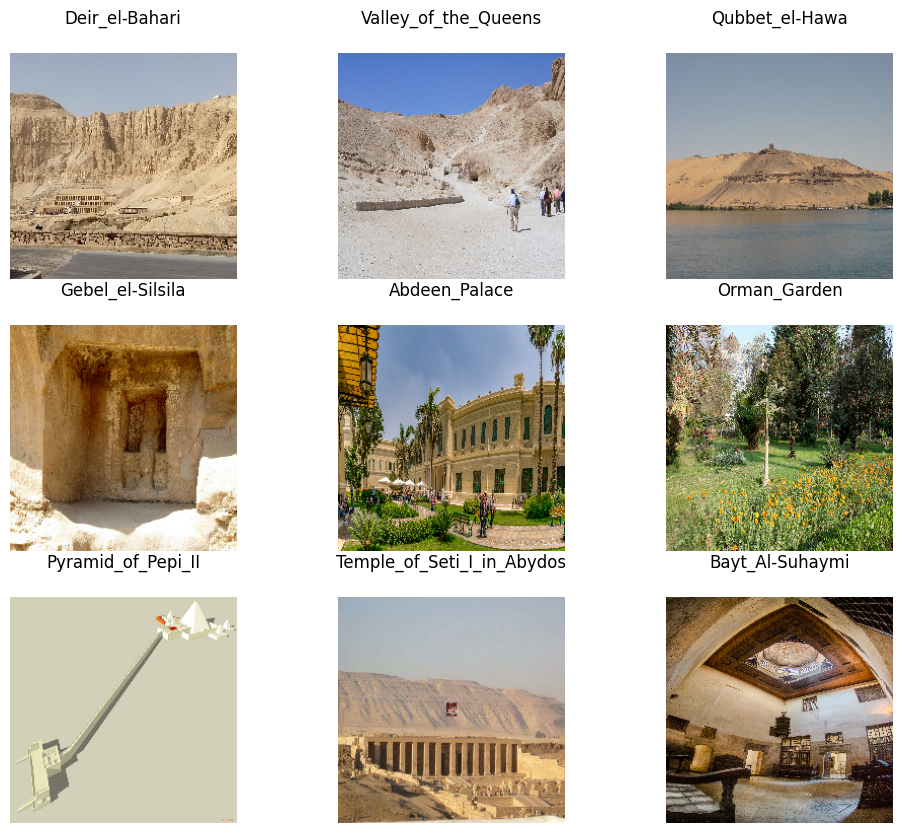

In [8]:
plt.figure(figsize=(12, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_data.class_names[labels[i]])
    plt.axis("off")

In [9]:
label_counts = {label : len( os.listdir(f"{data_path}/{label}") ) for label in train_data.class_names }

In [10]:
label_counts = pd.Series(label_counts)
label_counts.sort_values(ascending=False, inplace=True)


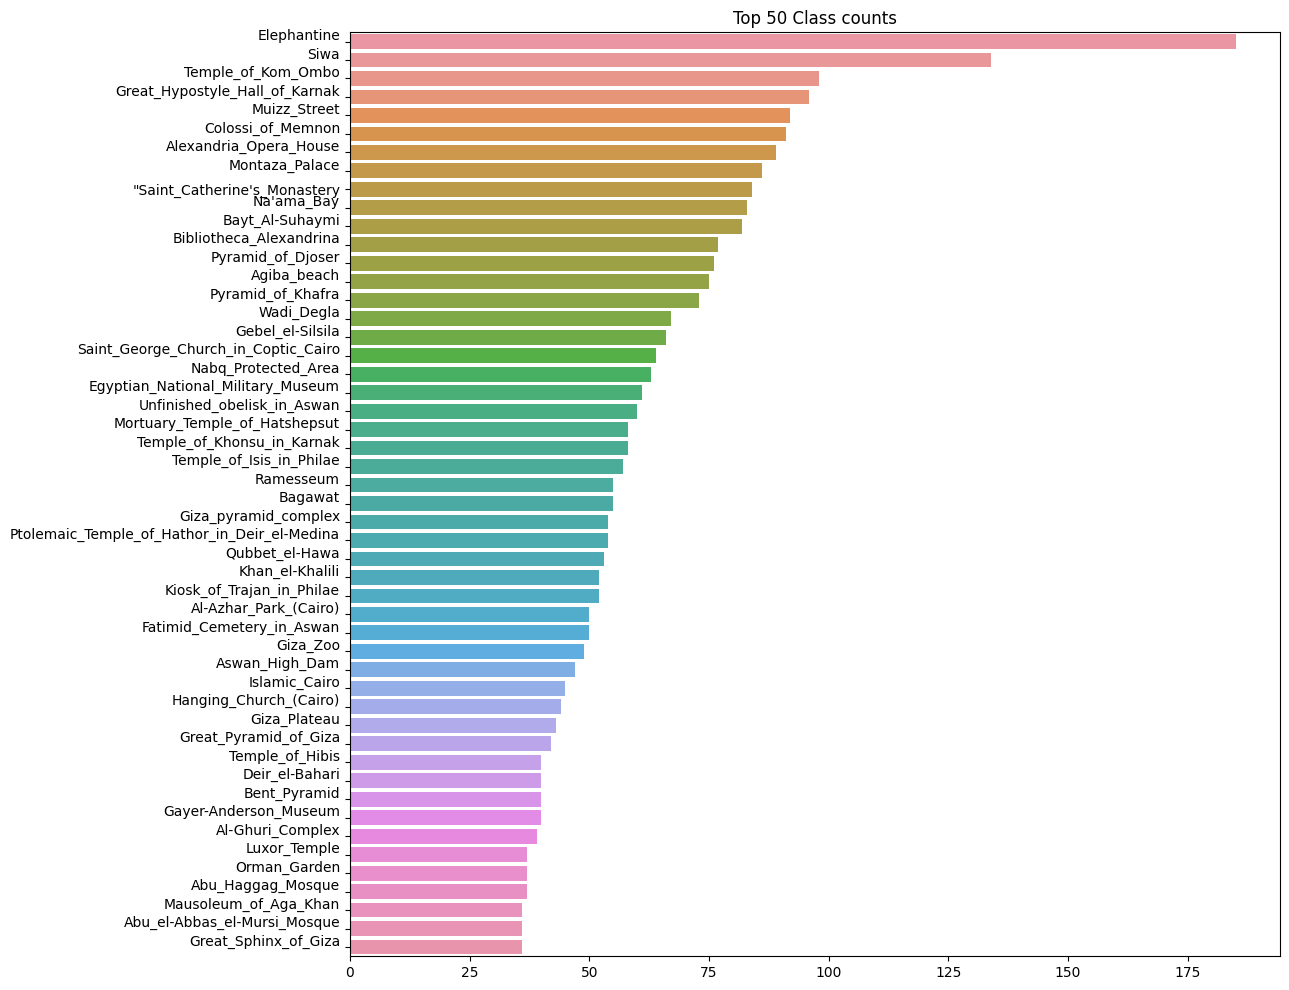

In [11]:
plt.figure(figsize=(12,12))
ax = sns.barplot(x=label_counts.values[:50], y=label_counts.index[:50])
ax.set_title("Top 50 Class counts")
plt.show()

In [12]:
label_counts[label_counts < 5]


Pyramid_of_Neferefre\n     4
Qurnet_Murai\n             4
Pyramid_of_Pepi_I\n        4
Qalawun_complex\n          4
Emir_Qurqumas_complex\n    4
                          ..
Gidi_Pass\n                1
Koubbeh_Palace\n           1
Pyramid_of_Seila\n         1
Sohag_Stadium\n            1
Amada\n                    1
Length: 88, dtype: int64